In [1]:
import yfinance as yf
import pmdarima as pm
from datetime import date
import warnings
from math import sqrt
import matplotlib.pyplot as plt
import time
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

In [3]:
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
stock = load_data('AMZN')

[*********************100%***********************]  1 of 1 completed


In [5]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,311.549988,312.980011,310.010010,310.350006,310.350006,2048000
1,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
2,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200
3,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000
4,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300


In [6]:
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1837,2022-04-19,3040.590088,3172.979980,3031.010010,3162.310059,3162.310059,2746300
1838,2022-04-20,3152.050049,3152.050049,3072.070068,3079.959961,3079.959961,2981500
1839,2022-04-21,3094.280029,3134.760010,2951.790039,2965.919922,2965.919922,3198500
1840,2022-04-22,2965.000000,2992.300049,2873.949951,2887.000000,2887.000000,3649800
1841,2022-04-25,2880.459961,2924.429932,2846.129883,2921.479980,2921.479980,3089300


In [7]:
stock.shape

(1842, 7)

In [8]:
df = stock[['Date', 'Close']]

In [9]:
df.head()

,Date,Close
0,2014-12-31,310.350006
1,2015-01-02,308.519989
2,2015-01-05,302.190002
3,2015-01-06,295.290009
4,2015-01-07,298.420013


In [10]:
df.shape

(1842, 2)

In [11]:
def trainTestSplit(df):
  train_size = int(len(df) * 0.80)
  df_train, df_test = df[0:train_size], df[train_size:]
  return df_train, df_test

In [12]:
df_train, df_test = trainTestSplit(df)

In [13]:
df_train.shape

(1473, 2)

In [14]:
df_test.shape

(369, 2)

**Stepwise search Using AutoArima function**

In [15]:
start_time = time.time()

stepWise_model = pm.auto_arima(df_train['Close'].values,
                      error_action='ignore', trace=True,
                      suppress_warnings=True,
                      seasonal=True, m = 12)

end_time = time.time()
total_time_sec = end_time - start_time
total_time_min = total_time_sec/60

print("Total time taken : ", total_time_sec)
print("Total time taken : ", total_time_min)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=14351.939, Time=5.79 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=14389.689, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=14382.482, Time=0.63 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=14383.036, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=14393.357, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=4.52 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=14354.425, Time=4.89 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=14357.682, Time=12.40 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=14358.444, Time=12.20 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=14364.976, Time=1.50 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=14361.408, Time=12.53 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=14361.534, Time=12.69 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=14353.538, Time=14.07 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=14372.739, Time=4.16 sec
 ARIMA

In [19]:
stepWise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 1473
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -7167.970
Date:                              Tue, 26 Apr 2022   AIC                          14351.939
Time:                                      15:37:34   BIC                          14394.295
Sample:                                           0   HQIC                         14367.733
                                             - 1473                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.0533      5.486      0.557      0.578      -7.700      13.806
ar.L1         -1.8666      0.008   -234.855      0.000      -1.882      -1.851
ar.L2         -0.9920      0.008   -130.687      0.000      -1.007      -0.977
ma.L1          1.8448      0.011    164.717      0.000       1.823       1.867
ma.L2          0.9753      0.011     91.217      0.000       0.954       0.996
ar.S.L12      -0.5307      0.141     -3.770      0.000      -0.807      -0.255
ma.S.L12       0.6230      0.137      4.558      0.000       0.355       0.891
sigma2      1032.4906     18.570     55.600      0.000     996.094    1068.887
===================================================================================
Ljung-Box (L1) (Q):                   1.46   Jarque-Bera (JB):              4436.69
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):              18.13   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# stepWise_model.plot_diagnostics(figsize=(15,8))

In [15]:
def rmse(targets, predictions):
  rmse = np.sqrt(((targets - predictions) ** 2).mean())
  normalised_rmse = rmse/(max(targets) - min(targets))
  return normalised_rmse

In [16]:
def plot_graph_with_confidenceInterval(model, df_test):
  test_pred, confint = model.predict(n_periods=len(df_test), return_conf_int=True)
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(df_test['Date'], df_test['Close'], label='data')
  ax.plot(df_test['Date'], test_pred, label='forecast')
  # ax.set_xlabel(f'Sunspots (RMSE={np.sqrt(mse(df_test['Close'].to_numpy(), test_pred)):.3f})')
  ax.fill_between(df_test['Date'], \
                  confint[:,0], confint[:,1], \
                  color='red', alpha=0.3)
  ax.legend();
  print("RMSE is : ",rmse(df_test['Close'].values, test_pred))
  return test_pred

RMSE is :  0.2055607145445826


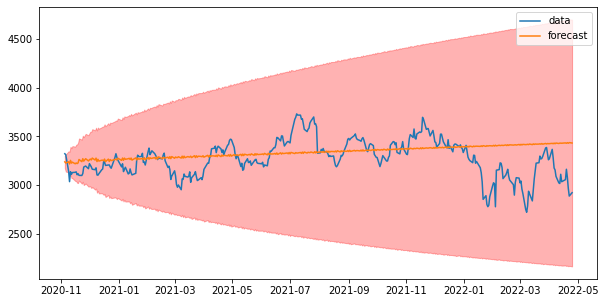

In [23]:
predictions = plot_graph_with_confidenceInterval(stepWise_model, df_test)

# GRID SEARCH

In [17]:
df_gridsearch = stock[['Date', 'Close']]

**Grid search for pmdarima library**

In [18]:
def pmdarima_model(data, arima_order, seasonal_order):
  # Fit an ARIMA
  model = pm.ARIMA(arima_order, seasonal_order=seasonal_order, suppress_warnings=True)
  model.fit(data)
  return model, model.aic()

In [19]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_pmdarima_models(dataset, p_values, d_values, q_values, P_values, D_values, Q_values, s_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				for P in P_values:
					for D in D_values:
						for Q in Q_values:
							for s in s_values:
								seasonal_order = (P,D,Q,s)
								try:
									model, aic = pmdarima_model(dataset, order, seasonal_order)
									if aic < best_score:
										best_score, best_cfg = aic, (order, seasonal_order)
									print('ARIMA%s%s AIC=%.3f' % (order,seasonal_order, aic))
								except:
									continue
				# try:
				# 	#rmse = evaluate_arima_model(dataset, order)
				# 	model, aic = pmdarima_model(dataset, order)
				# 	if aic < best_score:
				# 		best_score, best_cfg = aic, order
				# 	print('ARIMA%s AIC=%.3f' % (order,aic))
				# except:
				# 	continue
	print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))
	return best_cfg

In [21]:
train_gridsearch, test_gridsearch = trainTestSplit(df_gridsearch)

Set the hyperparameter range for grid search

In [25]:
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)
seasonal_p_values = range(0,2)
seasonal_d_values = range(0,1)
seasonal_q_values = range(0,2)
seasonal_s_values = range(0,4)
warnings.filterwarnings("ignore")

In [26]:
#start the timer
start_time = time.time()

best_configuration = evaluate_pmdarima_models(train_gridsearch['Close'].values, p_values, d_values, q_values, seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_s_values)

#stop the timer
end_time = time.time()
total_time_sec = end_time - start_time
total_time_min = total_time_sec/60

print("Total time taken : ", total_time_sec)
print("Total time taken : ", total_time_min)

ARIMA(0, 0, 0)(0, 0, 0, 0) AIC=23668.719
ARIMA(0, 0, 0)(0, 0, 0, 1) AIC=23668.719
ARIMA(0, 0, 0)(0, 0, 0, 2) AIC=23668.719
ARIMA(0, 0, 0)(0, 0, 0, 3) AIC=23668.719
ARIMA(0, 0, 0)(0, 0, 1, 2) AIC=21784.007
ARIMA(0, 0, 0)(0, 0, 1, 3) AIC=21783.023
ARIMA(0, 0, 0)(1, 0, 0, 2) AIC=15302.306
ARIMA(0, 0, 0)(1, 0, 0, 3) AIC=15899.960
ARIMA(0, 0, 0)(1, 0, 1, 2) AIC=17572.276
ARIMA(0, 0, 0)(1, 0, 1, 3) AIC=20025.633
ARIMA(0, 0, 1)(0, 0, 0, 0) AIC=21813.264
ARIMA(0, 0, 1)(0, 0, 0, 1) AIC=21813.264
ARIMA(0, 0, 1)(0, 0, 0, 2) AIC=21813.264
ARIMA(0, 0, 1)(0, 0, 0, 3) AIC=21813.264
ARIMA(0, 0, 1)(0, 0, 1, 2) AIC=19969.769
ARIMA(0, 0, 1)(0, 0, 1, 3) AIC=20677.121
ARIMA(0, 0, 1)(1, 0, 0, 2) AIC=14416.779
ARIMA(0, 0, 1)(1, 0, 0, 3) AIC=20442.901
ARIMA(0, 0, 1)(1, 0, 1, 2) AIC=15684.094
ARIMA(0, 0, 1)(1, 0, 1, 3) AIC=19835.774
ARIMA(0, 0, 2)(0, 0, 0, 0) AIC=20618.832
ARIMA(0, 0, 2)(0, 0, 0, 1) AIC=20618.832
ARIMA(0, 0, 2)(0, 0, 0, 2) AIC=20618.832
ARIMA(0, 0, 2)(0, 0, 0, 3) AIC=20618.832
ARIMA(0, 0, 2)(0

In [29]:
order, seasonal_order = best_configuration
print(order)
print(seasonal_order)

(2, 1, 2)
(1, 0, 0, 3)


AIC is :  14361.53301812716
RMSE is :  0.39546814421038773


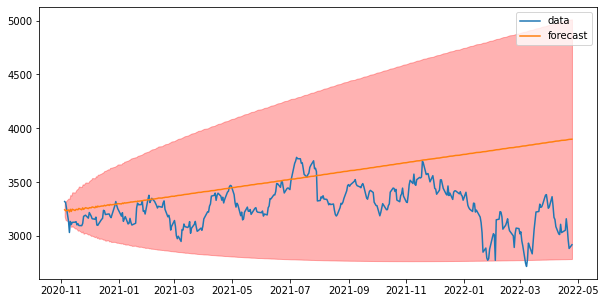

In [30]:
model1, aic = pmdarima_model(train_gridsearch['Close'].values, order, seasonal_order)
print("AIC is : ", aic)
predictions_gridsearch = plot_graph_with_confidenceInterval(model1, test_gridsearch)

# Bayesian Search

In [41]:
df_bayes = stock[['Date', 'Close']]

In [42]:
train_bayes, test_bayes = trainTestSplit(df_bayes)

In [43]:
from skopt.searchcv import BayesSearchCV
from skopt.space import Integer, Real, Categorical 
from skopt.utils import use_named_args
from skopt import gp_minimize

In [59]:
def pmdarima_model_Bayesian(data, arima_order, seasonal_order):
  # Fit an ARIMA
  model = pm.ARIMA(arima_order, seasonal_order=seasonal_order, suppress_warnings=True)
  model.fit(data)
  return model.aic()

In [65]:
# define the space of hyperparameters to search
search_space = list()
search_space.append(Integer(0, 5, name='p'))
search_space.append(Integer(0, 3, name='d'))
search_space.append(Integer(0, 5, name='q'))
search_space.append(Integer(0, 2, name='P'))
search_space.append(Integer(0, 1, name='D'))
search_space.append(Integer(0, 2, name='Q'))
search_space.append(Integer(2, 12, name='s'))

In [90]:
# define the function used to evaluate a given configuration

@use_named_args(search_space)
def evaluate_model_BayesianSearch(p, d, q, P, D, Q, s):
    # print("--------------------------------------")
    aic = float(7879139474)
    if(p == P or q == Q or d == D):
        return aic
    # else:
    #     aic =  pmdarima_model_Bayesian(train_bayes['Close'].values, (p,d,q), seasonal_order=(P,D,Q,s))
    try:
        aic = pmdarima_model_Bayesian(train_bayes['Close'].values, (p,d,q), seasonal_order=(P,D,Q,s))
    except:
        return aic

    order = ((p,d,q),(P,D,Q,s))
    print(order)
    print(aic)
    return aic

In [94]:
#start the timer
start_time = time.time()

# perform optimization
result = gp_minimize(
    func=evaluate_model_BayesianSearch,
    dimensions=search_space,
    n_calls=15,
    verbose=True
)

#stop the timer
end_time = time.time()
total_time_sec = end_time - start_time
total_time_min = total_time_sec/60

print("Total time taken : ", total_time_sec)
print("Total time taken : ", total_time_min)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: 7879139474.0000
Current minimum: 7879139474.0000
Iteration No: 2 started. Evaluating function at random point.
((1, 2, 2), (0, 1, 0, 6))
15283.007943413115
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.9577
Function value obtained: 15283.0079
Current minimum: 15283.0079
Iteration No: 3 started. Evaluating function at random point.
((4, 0, 0), (0, 1, 1, 7))
14346.651393125427
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 4.6638
Function value obtained: 14346.6514
Current minimum: 14346.6514
Iteration No: 4 started. Evaluating function at random point.
((2, 3, 3), (0, 1, 1, 5))
14954.432779919858
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 18.1197
Function value obtained: 14954.4328
Current minimum: 14346.6514
Iteration No: 5 started. Evaluating function at ra

In [95]:
print('Best Accuracy: %.3f' % (result.fun))
order = (result.x[0], result.x[1], result.x[2])
seasonal_order = (result.x[3], result.x[4], result.x[5], result.x[6])
print('Best Parameters: %s%s' % (order, seasonal_order))

Best Accuracy: 14346.651
Best Parameters: (4, 0, 0)(0, 1, 1, 7)


AIC is :  14346.651393125427
RMSE is :  0.3527289744659815


array([3241.08683224, 3244.51280034, 3227.48336549, 3232.97200453,
       3224.90435109, 3234.2464895 , 3231.9554639 , 3242.68952619,
       3242.38642853, 3239.47017503, 3243.1477065 , 3235.86599035,
       3244.1355486 , 3242.07741308, 3252.72285431, 3252.5184049 ,
       3249.58833412, 3253.28725035, 3246.00834551, 3254.29074063,
       3252.24175894, 3262.89813914, 3262.7036726 , 3259.78392044,
       3263.49294676, 3256.22420713, 3264.51669977, 3262.47780156,
       3273.14422592, 3272.95977607, 3270.050008  , 3273.76898835,
       3266.51017165, 3274.81255674, 3272.78352035, 3283.45977609,
       3283.28512725, 3280.38512991, 3284.11385082, 3276.86474459,
       3285.17681016, 3283.15742434, 3293.84330085, 3293.67824305,
       3290.78780714, 3294.52605993, 3287.28645615, 3295.6079948 ,
       3293.59805281, 3304.29334399, 3304.13767177, 3301.25659245,
       3305.00417294, 3297.77386803, 3306.10467684, 3304.10397637,
       3314.80848052, 3314.66199282, 3311.79006965, 3315.54677

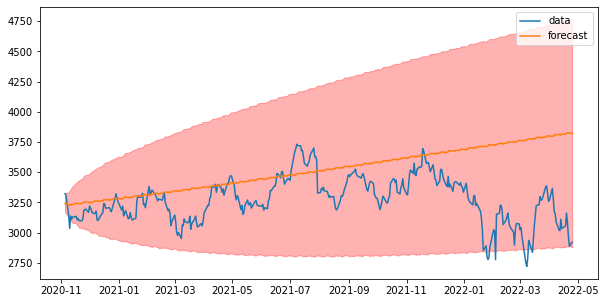

In [96]:
Bayes_model, aic = pmdarima_model(train_bayes['Close'].values, order, seasonal_order)
print("AIC is : ", aic)
plot_graph_with_confidenceInterval(Bayes_model, test_bayes)